# **Using Tensorflow for detecting Covid-19 Infected Lungs from Normal Lungs with Chest X-Ray**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


In [4]:
tf.random.set_seed(12)

 ## Importing kaggle Data Train_Val Set

### Use /tmp to create temporary folder

In [5]:
!ls /

bin   entrypoint.sh  kaggle  media  proc  run_jupyter.sh  srv  usr
boot  etc	     lib     mnt    root  sbin		  sys  var
dev   home	     lib64   opt    run   src		  tmp


In [6]:
!mkdir /tmp/Xray_train_data

In [7]:
!cp -R "../input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19" "/tmp/Xray_train_data"

In [8]:
!cp -R "../input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL" "/tmp/Xray_train_data"

In [9]:
!ls "/tmp/Xray_train_data"

COVID-19  NORMAL


In [10]:
!ls -1 "/tmp/Xray_train_data/COVID-19"| wc -l 

219


In [11]:
!ls -1 "/tmp/Xray_train_data/NORMAL"| wc -l 

1341


In [12]:
# Deleting extra image
!find "/tmp/Xray_train_data/NORMAL" -type f -print0 | sort -zR | tail -zn +220 | xargs -0 rm

In [13]:
!ls -1 "/tmp/Xray_train_data/NORMAL"| wc -l 

219


### To deal with imbalanced dataset, I just took a lazy way out.

## **Starting Actual work**

In [14]:
train_data_dir= "/tmp/Xray_train_data"

In [15]:
# Used Sequential
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(.1, input_shape=(32,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [16]:
# Defining optimizer
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [17]:
# Directing Images to train folder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width=64,64
batch_size=16
train_datagen = ImageDataGenerator(validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data
# Splitting images for validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data


Found 308 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [18]:
# Training the model
trainer=model.fit(train_generator,validation_data=validation_generator,epochs=10,verbose=2)

Epoch 1/10
20/20 - 12s - loss: 11.3663 - accuracy: 0.4675 - val_loss: 7.7408 - val_accuracy: 0.6000
Epoch 2/10
20/20 - 11s - loss: 4.5635 - accuracy: 0.7045 - val_loss: 3.5706 - val_accuracy: 0.7462
Epoch 3/10
20/20 - 11s - loss: 2.1495 - accuracy: 0.8149 - val_loss: 3.4849 - val_accuracy: 0.8077
Epoch 4/10
20/20 - 11s - loss: 1.6937 - accuracy: 0.8506 - val_loss: 1.9767 - val_accuracy: 0.8462
Epoch 5/10
20/20 - 11s - loss: 1.2325 - accuracy: 0.9026 - val_loss: 2.2108 - val_accuracy: 0.8462
Epoch 6/10
20/20 - 11s - loss: 0.8842 - accuracy: 0.8994 - val_loss: 1.3561 - val_accuracy: 0.9077
Epoch 7/10
20/20 - 11s - loss: 0.3735 - accuracy: 0.9351 - val_loss: 1.8989 - val_accuracy: 0.8615
Epoch 8/10
20/20 - 11s - loss: 0.3084 - accuracy: 0.9481 - val_loss: 0.9758 - val_accuracy: 0.9000
Epoch 9/10
20/20 - 11s - loss: 0.3495 - accuracy: 0.9383 - val_loss: 0.9359 - val_accuracy: 0.9000
Epoch 10/10
20/20 - 11s - loss: 0.1992 - accuracy: 0.9643 - val_loss: 0.7365 - val_accuracy: 0.9077


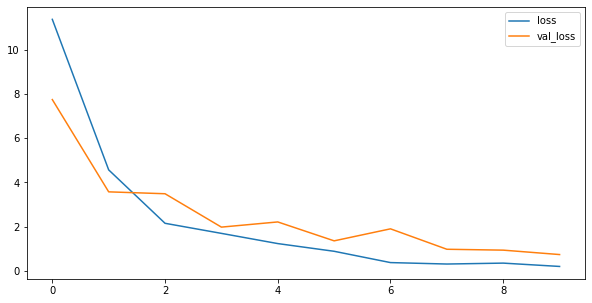

In [19]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(trainer.history["loss"],label="loss")
plt.plot(trainer.history["val_loss"],label="val_loss")
plt.legend()

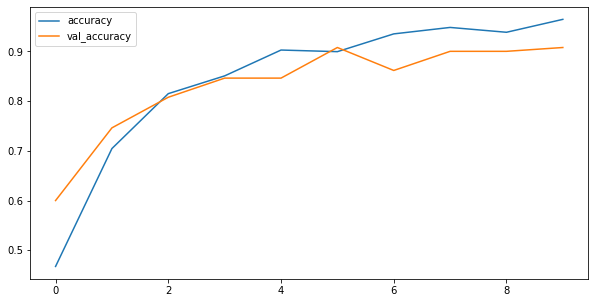

In [20]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(trainer.history["accuracy"],label="accuracy")
plt.plot(trainer.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

#### Version 3 doesnot have any significance update. Just updated some folder issue.
#### Thanks to @sarques

## If helped, do give an upvote. It means a lot.